# Taks 1: Data scraping

The codes for Task 1:

**XJTLU**<br>
**Name:** Jeongyoeng Park <br>
**ID:** 2032801 <br>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

def getBooksURLs(url):
    soup = getAndParseURL(url)
    # remove the index.html part of the base url before returning the results
    return(["http://books.toscrape.com/catalogue/" + x.a.get('href') for x in soup.findAll( "div", class_="image_container")])

url = "http://books.toscrape.com/catalogue/page-"
booksURLs=[]

for page in range(1,51): #Page1-50
    complete_url = url+str(page)+".html"
    booksURLs.append(getBooksURLs(complete_url))

#Empty [] to store scraped data
Author = []
Title = []
Review = []
Rating = []
Description = []
Price = []
Type = []
Category = []
Availability = []

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"}
# scrape data for every book URL
for i in range(0,50):
    for url in booksURLs[i]:
        soup = getAndParseURL(url)
        
#         print(url)
        
        # product title
        t=soup.find("div", class_="col-sm-6 product_main").h1.text
        Title.append(str(t.encode('latin1').decode('utf-8')))
        
        # product price
        Price.append(float(soup.find("p", class_ = "price_color").text[2:]))
        
        # product category
        Category.append(str(soup.select('li')[2].a.text))
        
        # product availability
        Availability.append(int(re.sub("[^0-9]", "", soup.find("p", class_ = "instock availability").text))) # get rid of non numerical characters
        
        # product rating
        star=soup.find("p", class_ = re.compile("star-rating")).get("class")[1]
        if star == 'One':
            Rating.append(1)
        elif star == "Two":
            Rating.append(2)
        elif star == "Three":
            Rating.append(3)
        elif star == "Four":
            Rating.append(4)
        elif star == "Five":
            Rating.append(5)
        else:
            Rating.append(0)
        
        # product review
        Review.append(int(re.sub("[^0-9]","", str(soup.select('td')[6]))))

        # product description
        Description.append(str(soup.find_all('p', class_=False, id=False)).encode('latin1').decode('utf-8')[4:-13])
        
        # product type
        Type.append(str(soup.select('td')[1])[4:-6])
        
        # product author    
        goodreadsURL = 'https://www.goodreads.com/search?utf8=%E2%9C%93&q=' + t + '&search_type=books'
        bookdeposiURL = "https://www.bookdepository.com/search?searchTerm=" + t + "&search=Find+book"

        result = requests.get(goodreadsURL, headers=headers)
        soup = BeautifulSoup(result.text, 'html.parser')
        author = soup.find('a', class_='authorName')
        if author is not None:
            Author.append(str(author.text))
        else:
            result = requests.get(bookdeposiURL, headers=headers)
            soup = BeautifulSoup(result.text, 'html.parser')
            author = soup.find('p', class_='author')
            if author is not None:
                Author.append(str(author.text.strip()))   
            else:
                Author.append(None)

scraped_data = pd.DataFrame({'Title': Title, 'Number_of_Reviews': Review, 'Rating':Rating,'Description':Description,'Price': Price, 'Procut_Type': Type, "Book_Category": Category, "Availability":Availability,'Author': Author})
scraped_data.to_csv('Jeongyeong_Park+2032801.csv')
scraped_data.head(10)

,Title,Number_of_Reviews,Rating,Description,Price,Procut_Type,Book_Category,Availability,Author
0,A Light in the Attic,0,3,It's hard to imagine a world without A Light i...,51.77,Book,Poetry,22,Shel Silverstein
1,Tipping the Velvet,0,1,"""Erotic and absorbing...Written with starling ...",53.74,Book,Historical Fiction,20,Sarah Waters
2,Soumission,0,1,"Dans une France assez proche de la nôtre, un h...",50.10,Book,Fiction,20,Michel Houellebecq
3,Sharp Objects,0,4,"WICKED above her hipbone, GIRL across her hear...",47.82,Book,Mystery,20,Gillian Flynn
4,Sapiens: A Brief History of Humankind,0,5,From a renowned historian comes a groundbreaki...,54.23,Book,History,20,Yuval Noah Harari
5,The Requiem Red,0,1,Patient Twenty-nine.A monster roams the halls ...,22.65,Book,Young Adult,19,Brynn Chapman
6,The Dirty Little Secrets of Getting Your Dream...,0,4,Drawing on his extensive experience evaluating...,33.34,Book,Business,19,Don Raskin
7,The Coming Woman: A Novel Based on the Life of...,0,3,"""If you have a heart, if you have a soul, Kare...",17.93,Book,Default,19,Karen J. Hicks
8,The Boys in the Boat: Nine Americans and Their...,0,4,For readers of Laura Hillenbrand's Seabiscuit ...,22.60,Book,Default,19,Daniel James Brown
9,The Black Maria,0,1,"Praise for Aracelis Girmay:""[Girmay's] every l...",52.15,Book,Poetry,19,Aracelis Girmay


# Bonus

#### Scraping author is done above in the 'for loop' used for scraping all the data.
Two websites are used for scarping author in order to get as many authors as possible.
1. goodreasds: https://www.goodreads.com/ 
2. bookdepository: https://www.bookdepository.com/

First, author is got from goodreads, 'a' tag with class_='authorName'. If there is no information of author on goodreads website, visit bookdepository website and get author from 'p' tag with class_='author'. If there is no author information in bookdepository as well, None will be append to the author list. 

# Task 2

# Topic: How should readers pick a good book from the online bookstore, Books to Scrape(http://books.toscrape.com/index.html)?

# Introduction
There are tremendous books to read in the current market. People choose books according to their reading purposes and personal tastes. However, there are people who spend a long and hard time choosing the right book and eventually end up choosing a random one. Hence, the result of this data analysis proposes which book readers should pick from an online bookstore, Books to Scrape(http://books.toscrape.com/index.html).


### Methods
In order to answer the question "How should readers pick a good book from the online bookstore?", Russ's research, "What readers say about choosing books to read for pleasure" was referred to and scraped data was analyzed. There are three hypotheses according to each book analysis by category, book analysis by author, and book analysis by price.

In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

df = pd.read_csv("Jeongyeong_Park+2032801.csv")

### 2. Presumption

There is a lack of detailed information such as the initial quantity of books, other than directly obtained information from the website. Therefore, it is necessary to set preassumptions. First, every book in this online bookstore is considered they have the same initial quantity. It is impossible to know the exact initial quantity of books, but if Book A’s availability is 18 and Book B’s availability is 5, it means that Book B has a higher sales rate than Book A. Second, data scraped from the online bookstore is the only information that can be got about each book. Extra research about each book such as award status was not conducted. Data analysis was only done based on acquired data containing: Title, Number of Reviews, Rating, Description, Product Type, Product Category, Availability, and Author. Lastly, the proposal about choosing a good book from this online bookstore is for readers who have no preference, or no special purpose for reading. Readers are assumed they do not know which book they should choose.

### 3.1 Analysis of Books by Category

Russ’s research suggests that readers first choose what category(genre) of books want to read in order to reduce options(Ross, 2021). However, if readers do not have any preferred category, a deciding category can also be very difficult. Let’s assume a category containing many books is worth choosing. In order to prove this hypothesis, first, the number of books in each category was figured out. Since categories with many books are the only focus, categories containing lower than 10 books and the ‘Default’ category are removed. 

#### 3.1.1 Get number of books in each category containing >=10 books and remove 'Default' category

In [27]:
# Get number of books in each category
category=pd.DataFrame(df['Book_Category'].value_counts())

# Get Only category contains more >=10 books and Remove Default category
df_C=category[category["Book_Category"]>=10]
df_C=df_C.drop(index="Default")
df_C= df_C.sort_values("Book_Category",ascending=True)

In [28]:
sns.reset_defaults()

<Figure size 20000x20000 with 0 Axes>

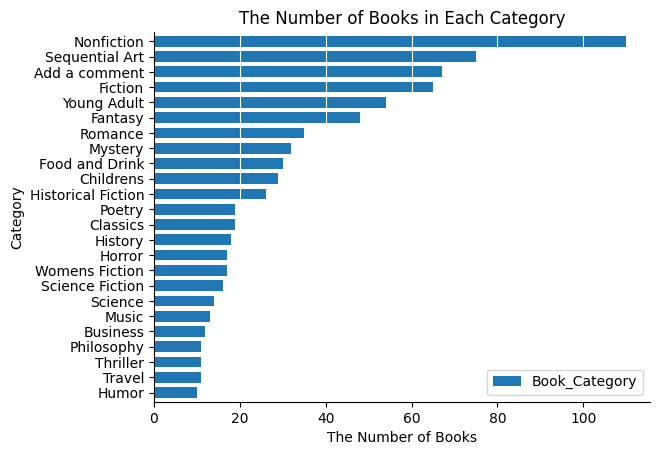

In [29]:
plt.figure(figsize=(200, 200))
df_C.plot(kind="barh", width=0.7)
plt.grid(axis = 'x', color ='white', linestyle='-')
# ax.tick_params(axis='both', which='both',length=0)
plt.title('The Number of Books in Each Category')
plt.xlabel('The Number of Books')
plt.ylabel('Category')
sns.despine()

The bar graph above illustrates the number of books in each category. As can be seen, ‘Nonfiction’ and ‘Sequential Art’ are the top 2 categories containing the most books. If readers decide to choose books within these categories, they are going to have a greater chance of finding a better book because there are more choices compared to other categories.

#### 3.1.2 Analyzing Availability and Price of Books in Top6 Categories

In order to get more information for proving the assumption, top6 categories obtained above are further analyzed.

In [30]:
# Get data of books in top6 categories
Top6_draft = df["Book_Category"].isin(['Fantasy', 'Young Adult',
       'Fiction', 'Add a comment', 'Sequential Art', 'Nonfiction'])
Top6 = df[Top6_draft]

In [31]:
# Obtain data needed
Top6_final = Top6[['Book_Category','Rating','Availability']]
avg_Top6 = Top6_final.groupby('Book_Category').mean()

In [32]:
# Average value of Rating and Avaliability of total books in dataset
avgT_rating=df["Rating"].mean()
avgT_availability=df['Availability'].mean()

<Figure size 1400x1600 with 0 Axes>

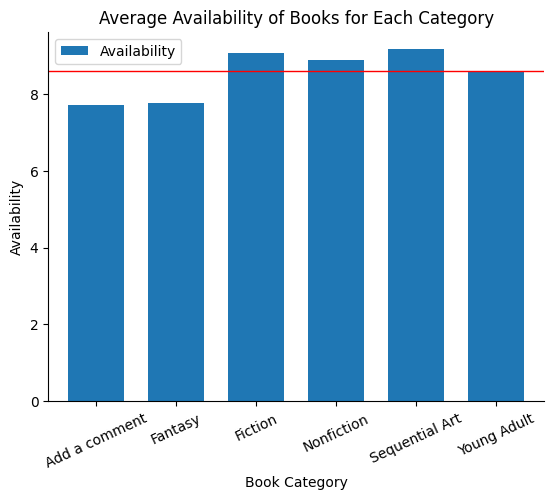

In [33]:
plt.figure(figsize=(14, 16))
avg_Top6[["Availability"]].plot(kind="bar", width=0.7)
plt.axline((0, avgT_availability), (4, avgT_availability),linewidth=1, color='r')
plt.xticks(rotation = 25)
plt.title('Average Availability of Books for Each Category')
plt.xlabel('Book Category')
plt.ylabel('Availability')
sns.despine()

The above bar graph shows the average availability of books for each category at the top6. The red horizontal line indicates the average value of the availability of every book in the dataset. Based on the presumption, if a book has a low availability value, it means that the book is consumed by many customers. 2 categories of the top6 have lower availability than average which designates books in those categories wew purchased more than others.

<Figure size 1400x1600 with 0 Axes>

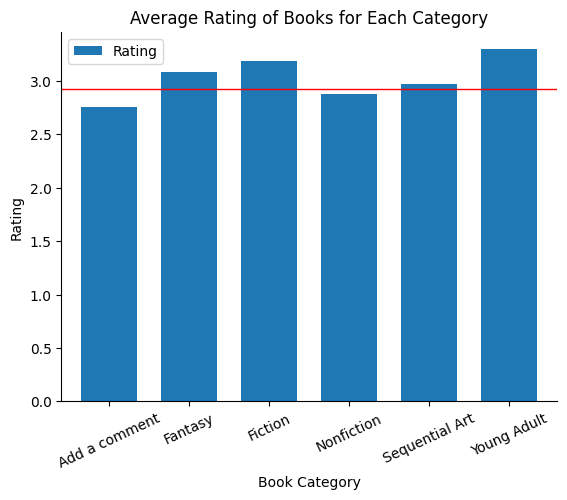

In [34]:
plt.figure(figsize=(14, 16))
avg_Top6[["Rating"]].plot(kind="bar", width=0.7)
plt.axline((0, avgT_rating), (20, avgT_rating), linewidth=1, color='r')
plt.xticks(rotation = 25)
plt.title('Average Rating of Books for Each Category')
plt.xlabel('Book Category')
plt.ylabel('Rating')
sns.despine()

The above bar chart shows the average rating of books for each category at the top6. The red horizontal line indicates the average rating of total books in the dataset. 4 of the categories have a higher rating average value than the total average. It means the top6 categories highly contain books with high ratings. Summing up these two bar charts, the top6 categories contain many books which are popular that people buy a lot and have good ratings. 

In conclusion, since it is proved that categories containing the most books have many great books, the assumption, ‘A category containing many books is worth choosing.’ is right. On this website, choosing the most interesting category within those top 6 categories would help a reader to find a good book.

### 3.2 Analysis of Books by the numbers of books written by the author

After choosing the category, readers will still face many books within that category. According to Ross’s paper, one of the important strategies for choosing decent books is choosing a book by a trusted author. Let’s assume authors who wrote multiple books are considered trustable authors and worth trying their books. In order to check this hypothesis, data from books written by authors who wrote multiple books and books written by authors who wrote a single book are separated. As mentioned in the presumption, no extra research was conducted, so even though an author wrote more than one book, if only one of his books is on the website, that author is considered a single-book author. 

In [35]:
#Author with multiple books(More than one book)
df_multipleB_info = df.duplicated(subset=['Author'], keep=False)
df_multipleB = df.loc[df_multipleB_info, :]

In [36]:
#Author with single book
df_singleB = df.drop_duplicates(subset=['Author'], keep=False)

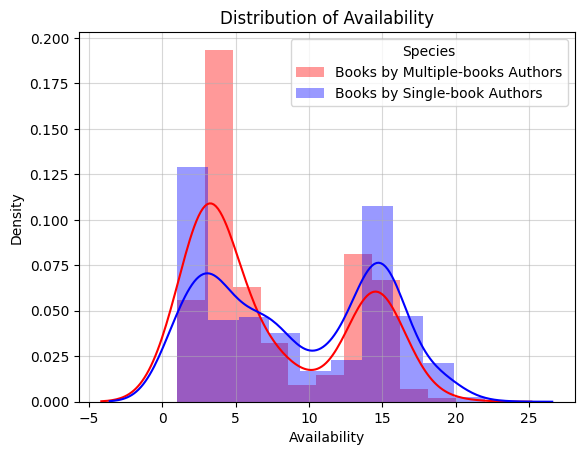

In [37]:
sns.distplot(df_multipleB["Availability"], color="red", label="Books by Multiple-books Authors",bins=10)
sns.distplot(df_singleB["Availability"], color="blue", label="Books by Single-book Authors",bins=10)
plt.legend(title="Species")
plt.title("Distribution of Availability")
plt.grid(True,alpha=0.5)
plt.show()

The above histogram with kernel density estimation illustrates the distribution of availability of the 2 groups(Authors with multiple -books and a single-book). Looking at the kernel density estimation(KDE) line, each distribution of 2 groups is bimodal distribution having two peaks. For the red graph indicating the distribution of books written by authors of multiple books, the left peak has a higher density value than the right peak so it is considered the major mode. This shows customers tend to purchase books written by authors with multiple books because many of that books have a distribution at lower availability. The blue KDE line is the opposite of it. It indicates books of authors who wrote a single book have a distribution at higher availability. It means not many customers purchase them and there are still many available books left in stock. If we compare the two graphs, they clearly show books written by authors with multiple books have higher density values at low availability, and books with authors who wrote a single book have higher density values at high availability.

In [38]:
Rate_M=[]
Rate_S=[]
for i in range(1,6):
    Rate_M.append(len(df_multipleB.loc[df_multipleB['Rating'] == i]))
    Rate_S.append(len(df_singleB.loc[df_singleB['Rating'] == i]))
    
label=['1','2','3','4','5']

Text(0.5, 1.0, 'Rating of Books of Single-book Authors')

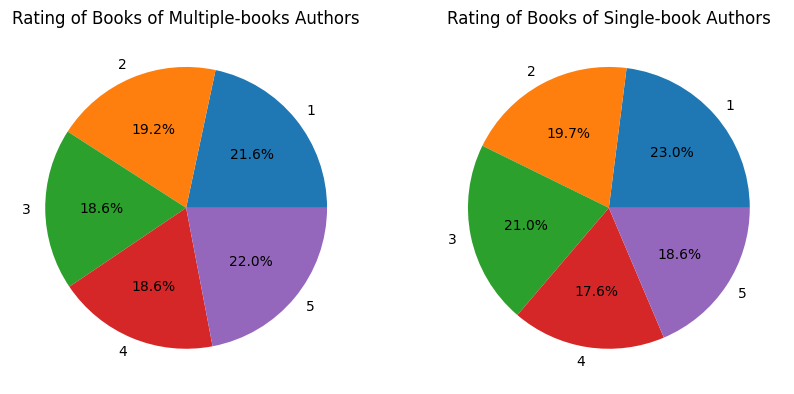

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].pie(Rate_M, labels=label, autopct='%.1f%%')
axs[0].set_title('Rating of Books of Multiple-books Authors',fontsize=12)

axs[1].pie(Rate_S, labels=label, autopct='%.1f%%')
axs[1].set_title('Rating of Books of Single-book Authors',fontsize=12)

In addition, pie charts above show books from multiple-books authors have more 4 stars ratings (19.0%) and 5 ratings (22.5%) compared to books from single books. It means books written by authors published many works give more satisfaction to readers.

Taking everything into account, the hypothesis ‘Authors who wrote multiple books are considered trustable authors and worth trying their books.’ is proved. People tend to purchase more books by authors who wrote more than one book which leads to the fact that people like that author’s book and trust his/her quality of work. In addition, among the books by authors who wrote multiple books, the proportion of books with 5 stars rating is the highest at 22.5%. To summarize, on this website, choosing the work of an author who wrote multiple books is a clever way to choose a book to read.

### 3.3 Analysis of Books by Price

After deciding to choose one of the books written by the author of multiple works, readers will face the final step of choosing a specific book among them. Russ’s research points out people do not hesitate to pay a high price for a book they think is worthy. Let's assume choosing an expensive book is worthwhile. In order to prove this, relationship between price, rating, and availability needs to be checked. 

In [40]:
avg_Price=df.Price.mean()
avg_Avail=df.Availability.mean()

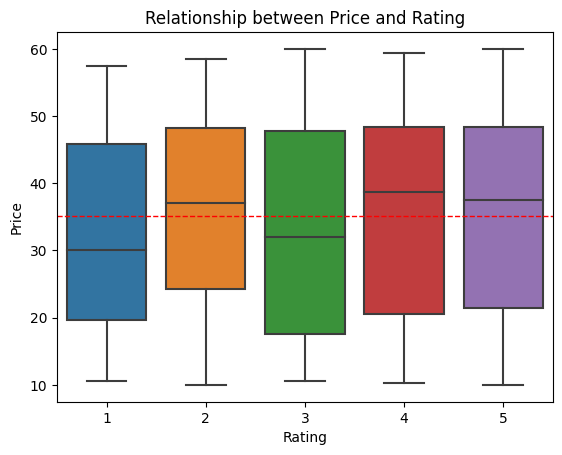

In [41]:
sns.boxplot(x='Rating', y='Price', data=df_multipleB).set_title('Relationship between Price and Rating')
plt.axline((0, avg_Price), (3, avg_Price),linewidth=1, color='r',linestyle='--')

A boxplot above shows the relationship between the price and rating of books from authors with multiple books. The Red dashed line shows the average price of total books on the website. As can be seen in the graph, the median values of 4 and 5 stars rating books are higher than the average price. It tells us there are more high-priced books than low-priced books in the 4 and 5 rating groups.

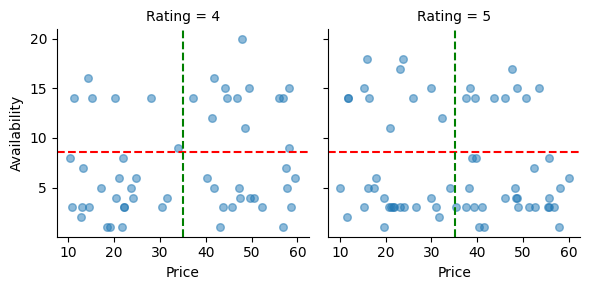

In [42]:
final=df_multipleB[(df_multipleB['Rating'] == 5)|(df_multipleB['Rating'] == 4)]
g = sns.FacetGrid(final, col="Rating", palette="Set1")
g.map(plt.scatter, "Price", "Availability", alpha=0.5, s=30)
g.map(plt.axhline, y=avg_Avail, ls='--', c='red')
g.map(plt.axvline, x=avg_Price, ls='--', c='green')

The scatter plot above illustrates the availability and price of books by authors who published multiple works, classified with ratings. The dashed lines are auxiliary lines to make the graph easier to see. The red dashed line indicates the average availability value of total books and the green line indicates the average price of total books. If we see the bottom right section, for the rating 4 group, the second most books are included in this section. For rating 5, most books are included in this section among 4 sections divided with dashed lines. It shows books with high prices are purchased a lot so the quantity currently available is low. Considering these two graphs, even though the books are expensive, people still purchase them because they are worthy and the satisfaction of books is shown as high ratings. 

Hence, the hypothesis that 'choosing an expensive book is worthwhile' is proved. Choosing high price products among books from authors with multiple works would increase the possibility of picking a good book.


### 4. Conclusion
As all the above points have demonstrated, there are 3 steps readers should consider in order to choose a good book from an online bookstore. The first is choosing a category. Based on the result of data analysis, if readers choose categories containing many books, they would have more chances to find a great book. The second is choosing a trusted author's book. The data shows that on this website, authors who wrote multiple works can be considered trusted authors. The final step is picking the high price books. The result of data analysis shows high price books are popular and give satisfaction to readers. It is expected that these 3 steps would be a great guide for readers who does not know how to find a great book.

### 5. References

1. C. S. Ross, “Making choices: What readers say about choosing books to read for pleasure,” Readers, Reading and Librarians, pp. 5–21, 2021. 